# Blackholes

Synthesizer has a collection of routines allowing us to also model the spectral energy distributions of black holes (i.e. AGN).

## Basic quantities

Let's first look at generating some simple observational quantities from physical properties. This is achieved through some functions that are held in `synthesizer/blackholes.py`.

In [9]:
import numpy as np
from synthesizer import blackholes
import matplotlib.pyplot as plt
from unyt import Msun, yr, Angstrom

#### Bolometric luminosities

First, we might like to calculate the bolometric luminosity from an accretion rate, defined as:
$ L_{\rm \bullet, bol} = \epsilon_{r}\dot{M}_{\bullet}c^{2} $

In [10]:
mdot = 1*Msun/yr # the accretion rate (is not a unyt_array then the code assume Msun/yr)
epsilon = 0.1 # the radiative efficiency (by default =0.1)
Lbol = blackholes.calculate_Lbol(mdot, epsilon=epsilon)
Lbol.to('erg/s')

unyt_quantity(5.66297517e+45, 'erg/s')

#### Bigbump temperature

The default AGN model used by `synthesizer` is the one built into the `cloudy` photoionisation code:

$ T_{BB} = \left ( \frac{3c^{6}}{8\pi6^{3}\sigma_{SB}G^{2}} \frac{\dot{M}_{\bullet}}{M^{2}_{\bullet}} \right )^{1/4}  = 2.24 \times 10^{9} \left ( \frac{\dot{M}_{\bullet}}{M_{\odot}\,yr^{-1}} \right )^{1/4} \left ( \frac{M_{\bullet}}{M_{\odot}} \right )^{-1/2} $


In [11]:
mbh = 1E8 * Msun
TBB = blackholes.calculate_TBB(mbh, mdot)
TBB

unyt_quantity(224000., 'K')

## SED models

Like with modelling the SEDs of stellar populations, most of `synthesizer`'s blackhole SED modelling is enabled via grids pre-computed via the `cloudy` photoionisation code.

#### Feltre et al. (2016) model

One (slight) exception to this is the incident SED model used by Feltre et al. (2016) to model the NLRs of AGN. This is actually used by `synthesizer` to generate the incident SED for the creation of some grids but we can also explore the incident spectrum without loading the relevant grid. This model is a simple series of power-laws.

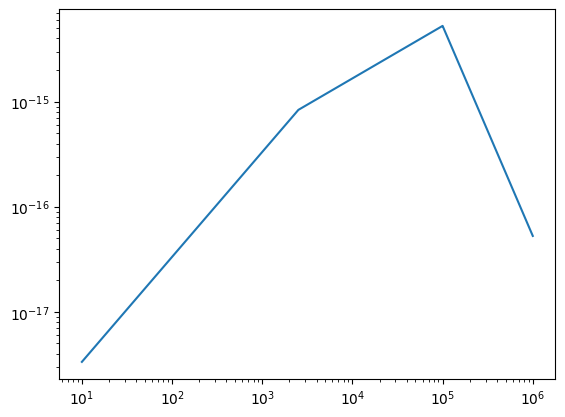

In [12]:
bh = blackholes.Feltre16() # initialise an instance of the Feltre16 class
alpha = -1
lam = np.arange(10, 1000000, 1) * Angstrom # define a wavelength grid
lnu = bh.incident(lam, alpha)
plt.loglog(lam, lnu)

## Parametric blackholes

## Particle blackholes